<a href="https://colab.research.google.com/github/ericariyanto/mti/blob/main/artificial-intelligence/1.1-KNN-Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table>
    <tr>
        <td>
          <div style="border-radius: 50%; overflow: hidden; width: 100px; height: 100px;">
            <img src="https://scontent.fpnk3-1.fna.fbcdn.net/v/t39.30808-6/301115564_185615523845739_8817859058938241886_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=a2f6c7&_nc_eui2=AeEbH1uX_X1sJmHi8m6wTACZe3T-TQ4mLp57dP5NDiYunnrYhcXnWSt2626aL8n2QVI&_nc_ohc=ov_0z4T3mV8AX_qLmq-&_nc_ht=scontent.fpnk3-1.fna&_nc_e2o=f&oh=00_AfDBhrJDiL3QefGQx_1yTtl819GPCf2cS7zagsLZQuwjBA&oe=651CCE2B" alt="Image" width="100" height="100" style="border-radius:50%;">
          </div>
        </td>
        <td>
            <h3><b>Eric Ariyanto</b></h3>
            <p><b>K-Nearest Neighbors (KNN)</b></p>
            <p>eric@students.amikom.ac.id</p>
        </td>
    </tr>
</table>


# The Dataset

Sampel dataset yang digunakan kali ini adalah Iris Dataset yang detailnya dapat dilihat [disini](https://www.kaggle.com/datasets/uciml/iris).

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" width="250" />


## Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Dataset

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign column names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

## Display our Dataset

In [ ]:
# Display top using head, default = 5
dataset.head(10) # display 10 data dari paling atas

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
# Display bottom using tail, default = 5
dataset.tail(7) # display 7 data dari paling bawah

,sepal-length,sepal-width,petal-length,petal-width,class
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## Prepocessing

Split dataset into attributes and labels. The x (independent variabel) contains the first four columns of the dataset (except class), while y (dependent variabel) contains the labels.


In [ ]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [ ]:
# test show variabel x
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
# test show variabel y
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

## Train Test Split

To avoid over-fitting, we will divide our dataset into training and test splits. We will split dataset into 80% train data and 20% test data.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [ ]:
# test show dataset count

print("Dataset : ", y.size, "\nTrain : ", y_train.size, "\nTest : ", y_test.size)

Dataset :  150 
Train :  120 
Test :  30


## Feature Scaling

agar tidak ada atribut yang lebih superior (jarak terlalu jauh), setiap atribut dilakukan scaling.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# show atribut after scaling
x_train

array([[ 0.74858453, -0.85425063,  0.95363797,  0.99358773],
       [ 0.62735627, -0.39249353,  1.12258958,  0.86398933],
       [-0.8273829 ,  0.99277776, -1.24273294, -1.20958506],
       [ 1.47595411,  0.30014211,  0.61573475,  0.34559573],
       [ 1.35472585,  0.06926356,  0.84100356,  1.51198132],
       [ 2.32455196,  1.6854134 ,  1.74207881,  1.38238292],
       [ 1.23349758, -0.16161498,  1.06627237,  1.25278453],
       [-0.46369811,  1.91629195, -1.07378133, -0.95038826],
       [-0.34246985,  0.99277776, -1.29905014, -1.20958506],
       [-0.94861116, -1.77776482, -0.17270609, -0.17279787],
       [ 1.11226932,  0.53102066,  1.17890678,  1.77117812],
       [-1.43352422,  0.76189921, -1.24273294, -1.07998666],
       [-0.22124158, -0.16161498,  0.27783153,  0.21599733],
       [ 0.02121495, -1.08512918,  0.22151433,  0.08639893],
       [-1.19106769,  0.76189921, -1.13009854, -1.20958506],
       [-1.31229596,  0.30014211, -1.13009854, -1.20958506],
       [ 1.8396389 , -0.

## Training and Predictions
menggunakan library untuk melakukan prediksi KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

n_neighbours merupakan parameter K pada K-NN, yaitu untuk menentukan berapa dataset terdekat untuk penentu hasil class.

In [ ]:
# show data yang akan di test
x_test

array([[-0.22124158, -0.39249353, -0.00375448,  0.21599733],
       [-0.22124158, -0.85425063,  0.33414874,  0.21599733],
       [-0.10001332, -0.62337208,  0.50310034,  0.21599733],
       [ 1.23349758,  0.30014211,  1.29154118,  1.51198132],
       [ 0.74858453, -0.62337208,  1.12258958,  1.25278453],
       [ 0.62735627, -0.85425063,  0.72836916,  0.86398933],
       [-0.46369811,  1.91629195, -1.29905014, -0.95038826],
       [-0.46369811, -0.16161498,  0.50310034,  0.47519413],
       [ 0.14244321, -0.16161498,  0.84100356,  0.86398933],
       [ 1.11226932, -1.31600773,  1.23522398,  0.86398933],
       [ 1.35472585,  0.30014211,  1.17890678,  1.51198132],
       [ 0.86981279, -0.16161498,  0.89732076,  1.12318613],
       [-0.34246985, -1.31600773,  0.22151433,  0.21599733],
       [-1.06983943,  0.06926356, -1.18641574, -1.33918346],
       [ 0.62735627, -1.77776482,  0.44678314,  0.21599733],
       [ 2.32455196, -0.16161498,  1.40417559,  1.51198132],
       [ 2.56700849,  1.

In [ ]:
# dapatkan hasil prediksi dan simpan dalam variabel y_pred

y_pred = classifier.predict(x_test)

In [ ]:
# Show hasil prediksi

y_pred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

In [ ]:
# show data asli nya (untuk nanti dibandingkan dengan hasil prediksi)

y_test

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

## Evaluating the Algorithm

menggunakan **Confusion Matrix** untuk menghitung tingkat akurasinya.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# bandingkan hasil prediksi dengan data aslinya
print(confusion_matrix(y_test,y_pred));
print(classification_report(y_test, y_pred))

[[ 5  0  0]
 [ 0 12  0]
 [ 0  1 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



## Comparing Error Rate with the K Value

untuk mencari akurasi yang lebih baik, kita dapat mengubah nilai K atau n_neighbors nya.

In [ ]:
error = []

# calculating error for K values between 1 and 40
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  pred_i = knn.predict(x_test)
  error.append(np.mean(pred_i != y_test))

Skript diatas melakukan perulangan dari 1 sampai 40 yang akan dijadikan sebagai nilai K, kemudian menyimpan berapa tingkat error nya.

Kita dapat menampilkan data error untuk melihat, nilai K mana yang akurasinya paling baik

Text(0, 0.5, 'Mean Error')

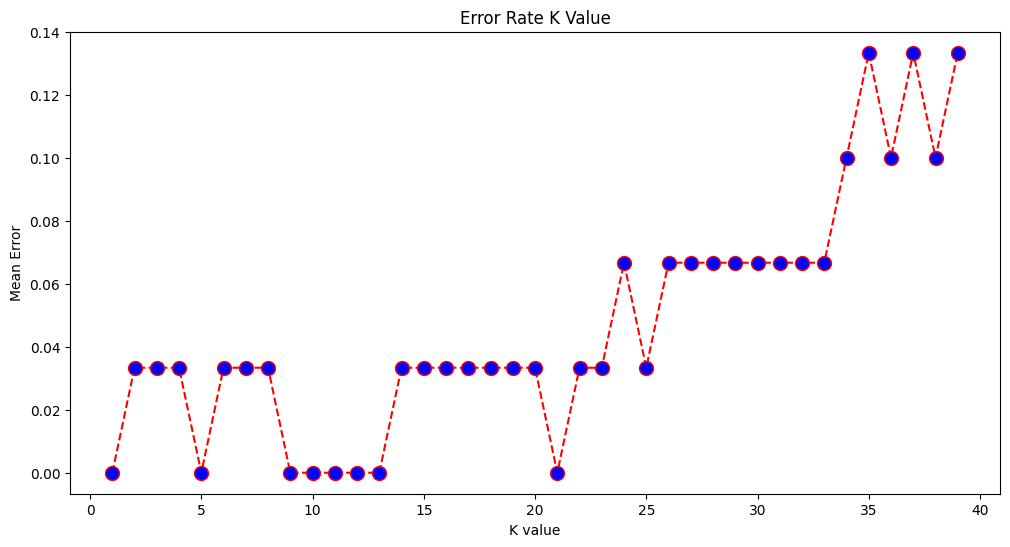

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K value')
plt.ylabel('Mean Error')

## Conclusion

KNN is a simple yet powerful classification algorithm. It requires no training for making predictions, which is typically one of the most difficult part of a machine learning algorithm.